In [7]:
import os

import matplotlib.pyplot as plt
from monai.data import ArrayDataset
from monai.transforms import Resize, EnsureChannelFirst, Compose, LoadImage, ScaleIntensity
from monai.utils import first
from torch.utils.data import DataLoader
import torch
import numpy as np

from loss import get_vertical_diameter
from loss import CDRLoss
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

transformer = Compose([LoadImage(image_only=True),
                                 EnsureChannelFirst(),
                                 ScaleIntensity()])

train_image_path = "data/REFUGE2/Train/Images/"
train_dm_path = "data/REFUGE2/Train/Disc_Masks/"

data = ArrayDataset(img=sorted([train_image_path + file for file in os.listdir(train_image_path)]),
                    img_transform=transformer,
                    seg=sorted([train_dm_path + file for file in os.listdir(train_dm_path)]),
                    seg_transform=transformer)

dataloader = DataLoader(data, batch_size=2, shuffle=False)

In [9]:
img, seg = first(dataloader)

In [10]:
# plt.imshow(seg[0][1])
indices = get_vertical_diameter(seg[:, 1])
indices

tensor([54, 68])

tensor([54, 68]) tensor([87, 85]) tensor([55, 69]) tensor([88, 86])


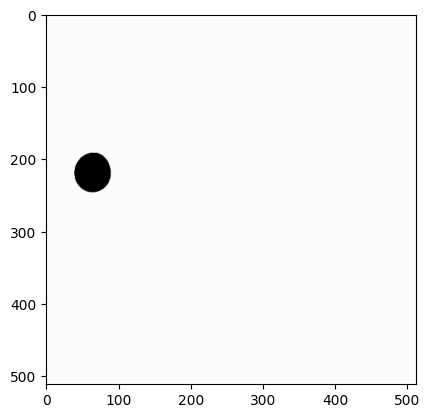

In [32]:
loss = CDRLoss(sigmoid=True, softmax=False)
value = loss(seg - 0.1, seg)
gradient = value[0].permute(1, 2, 0)
plt.imshow(value[0].permute(1, 2, 0)[:, :, 1] * 10**5, cmap='gray')
A = np.array(value[0].permute(1, 2, 0)[:, :, 1] * 10**5)